<a href="https://colab.research.google.com/github/drishyatv/Assignment_clustering/blob/main/assignmntcllustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Techniques on the Iris Dataset

Objective:
    To apply and analyze clustering techniques—KMeans and Hierarchical Clustering—on the Iris dataset using Python.

1. Loading and Preprocessing

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



 2A. KMeans Clustering

 Description:

    * KMeans is an unsupervised clustering algorithm that partitions data into k clusters. It works by:

    * Randomly initializing k centroids.

    * Assigning each data point to the nearest centroid.

    * Recomputing the centroids based on current assignments.

    * Repeating steps 2–3 until convergence(no change in assignments).


❓ Why is KMeans suitable for Iris?

    The Iris dataset contains continuous numerical features (e.g., sepal/petal length/width).

    It's relatively low-dimensional and well-separated, making it ideal for centroid-based clustering.


C:\Users\ANJ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


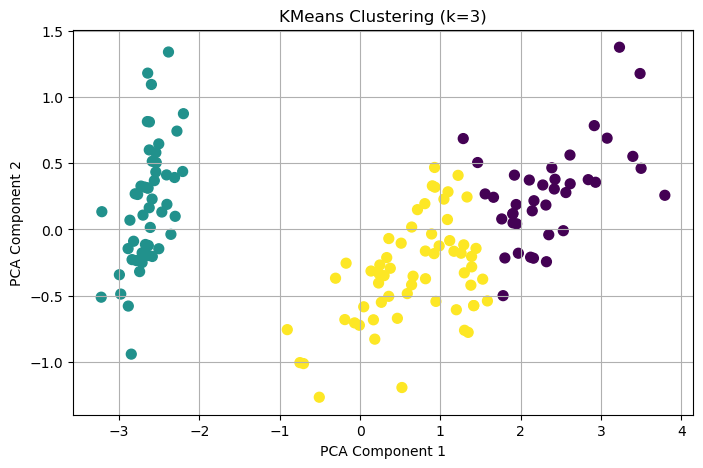

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()



 2B. Hierarchical Clustering (4 marks)

 Description:

 Hierarchical clustering creates a tree of clusters (dendrogram). It can be:

    Agglomerative: Bottom-up approach (merging clusters).
    Divisive: Top-down (splitting clusters).
    
The distance between clusters can be measured using methods like single, complete, average, or ward linkage.

❓ Why is Hierarchical Clustering suitable for Iris?
   
    Doesn’t require the number of clusters to be specified upfront.
    Provides a dendrogram that helps visualize nested clusters.
    Works well with small datasets like Iris.

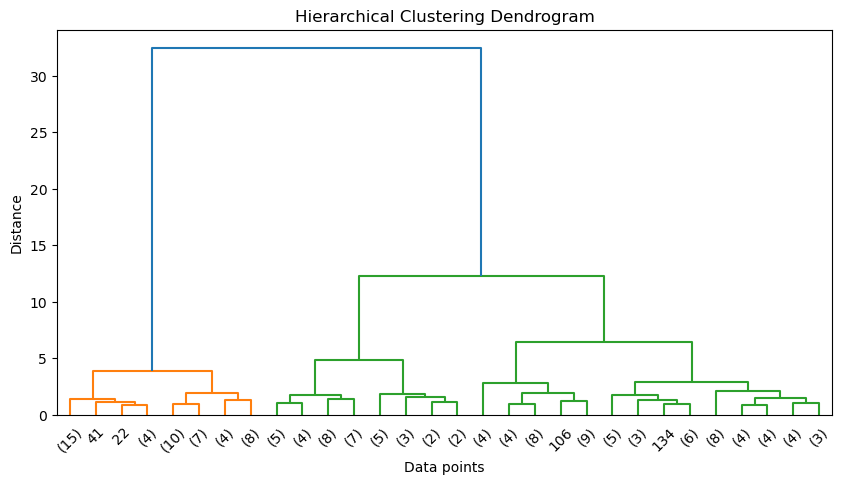

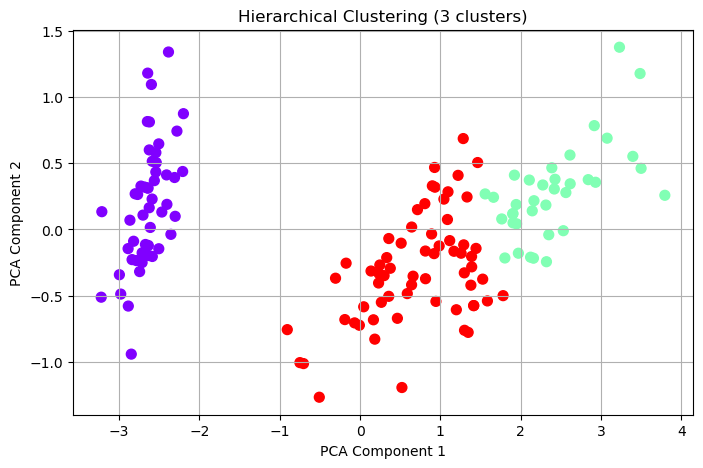

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns

# Linkage matrix
linked = linkage(df, method='ward')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Get cluster labels
hc_labels = fcluster(linked, 3, criterion='maxclust')

# Plot PCA with hierarchical clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hc_labels, cmap='rainbow', s=50)
plt.title('Hierarchical Clustering (3 clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
